In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster
import pandas as pd
import os

In [6]:
files=glob.glob("./Stocks/*.txt")
print(np.shape(files))
print(files[:20])

(7194,)
['./Stocks/ardc.us.txt', './Stocks/epix.us.txt', './Stocks/eab.us.txt', './Stocks/batra.us.txt', './Stocks/inbk.us.txt', './Stocks/bgx.us.txt', './Stocks/strt.us.txt', './Stocks/manh.us.txt', './Stocks/atus.us.txt', './Stocks/icbk.us.txt', './Stocks/ftnt.us.txt', './Stocks/nhld.us.txt', './Stocks/dfs.us.txt', './Stocks/scvl.us.txt', './Stocks/ing.us.txt', './Stocks/hope.us.txt', './Stocks/jpt.us.txt', './Stocks/ocfc.us.txt', './Stocks/gsk.us.txt', './Stocks/apog.us.txt']


In [7]:
# Analizo todas los  x="high" y="nombre del archivo". Ejm

In [55]:
data = pd.read_csv("{}".format(files[0]),delimiter=",")
labels=data.keys()
print(labels)
print(np.shape(data))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
(1249, 7)


In [51]:
# #Datos excluidos
# for f in files[:]:
#     if(os.stat("{}".format(f)).st_size != 0):
#         data = pd.read_csv("{}".format(f),delimiter=",")
#         if (len(data["Date"])<50):
#             print(f," ",len(data["Date"])," ",os.stat("{}".format(f)).st_size)

In [47]:
n_max=1200#number of files taken
n_data=50# last days taken
#n_max=len(files)
X=[]
cnt=0
for f in files[:n_max]:
    if(os.stat("{}".format(f)).st_size != 0):
        data = pd.read_csv("{}".format(f),delimiter=",")
        label=data.keys()
        if(len(data[label[0]])>49):
            X=np.append(X,data[label[2]][-n_data:])#toma todos los datos con high
            cnt+=1
#        Y=np.append(Y,data[label[4]][-n_data:])#toma todos los datos con high
X=X.reshape(cnt,n_data)
Y=np.arange(cnt)
#Y=Y.reshape(n_max,n_data)
#print(20*3201)
print(np.shape(X))
print(np.shape(Y))

(1137, 50)
(1137,)


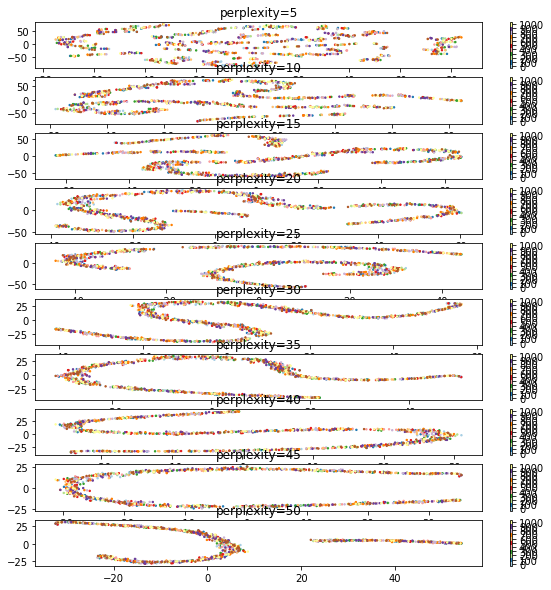

In [94]:
plt.figure(1,figsize = (10,10))
for i in range(5,55,5):
    tsne = sklearn.manifold.TSNE(perplexity=i)
    tsne.fit(X)
    embedding = tsne.embedding_
    np.shape(embedding)
    plt.subplot(5,2,i/5)
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=2.0)
    #plt.colorbar(boundaries=Y-0.5).set_ticks(np.arange(0,cnt,50))#(Y)
    plt.colorbar(boundaries=np.arange(0,cnt,100)-50).set_ticks(np.arange(0,cnt,100))
    plt.title("perplexity={}".format(i))
plt.savefig("tsne.png")

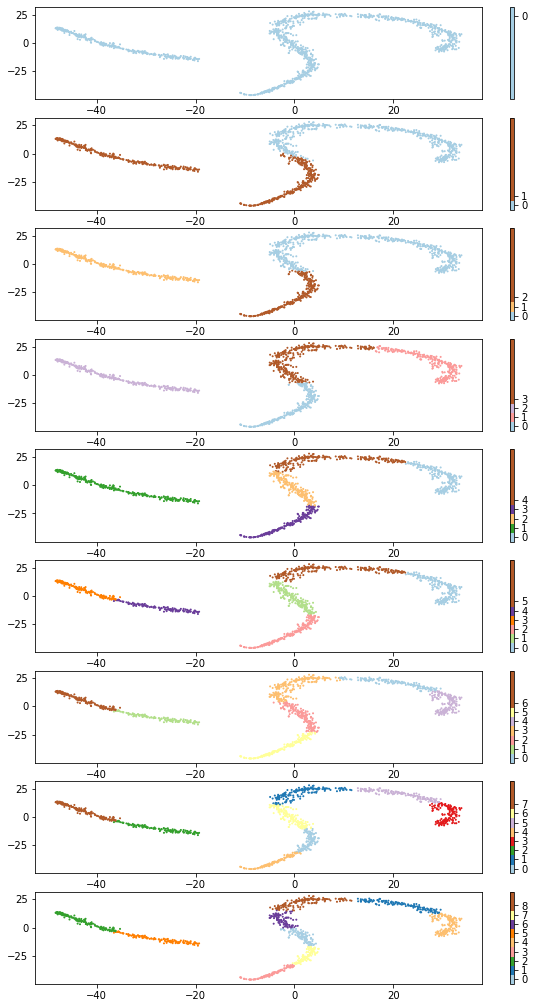

In [88]:
#n_clusters = 10
plt.figure(3,figsize = (10,20))
for n_clusters in range(1,10):
    k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
    k_means.fit(embedding) # training
    cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
    distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
    plt.subplot(10,1,n_clusters)
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(n_clusters))
plt.savefig("clusters.png")

# Discusión

Al aplicar t-SNE se observa el agrupamiento de los elementos en un conjunto de líneas, en las cuales cada número está relacionado con el nombre de un mercado de la siguiente forma:

In [85]:
print("Mercado"," ","Número")
for i,f in enumerate(files[:n_max]):
    if(os.stat("{}".format(f)).st_size != 0):
        print(f[9:-4]," ",i)
 

Mercado   Número
ardc.us   0
epix.us   1
eab.us   2
batra.us   3
inbk.us   4
bgx.us   5
strt.us   6
manh.us   7
atus.us   8
icbk.us   9
ftnt.us   10
nhld.us   11
dfs.us   12
scvl.us   13
ing.us   14
hope.us   15
jpt.us   16
ocfc.us   17
gsk.us   18
apog.us   19
mlvf.us   20
ktn.us   21
stot.us   22
rcky.us   23
ldl.us   24
dlx.us   25
rtix.us   26
sb.us   27
hyb.us   28
ckh.us   29
gne.us   30
scacw.us   31
spb.us   32
eye.us   33
oilu.us   34
iii.us   35
fomx.us   36
yume.us   37
tpre.us   38
fran.us   39
krma.us   40
ale.us   41
bxp_b.us   42
mlp.us   43
amed.us   44
pmbc.us   45
ship.us   46
ergf.us   47
sonc.us   48
cw.us   49
ubs.us   50
orrf.us   51
race.us   52
evgbc.us   53
hsea.us   54
dcf.us   55
nfbk.us   56
agfs.us   57
clvs.us   58
uri.us   59
mkl.us   60
mnr.us   61
swin.us   62
lvus.us   63
sep.us   64
tpz.us   65
irdm.us   66
bracr.us   67
blph.us   68
spab.us   69
fixd.us   70
brg_d.us   71
bml_l.us   72
iret_b-cl.us   73
dl.us   74
ssi.us   75
kai.us   76
cveo.us   77

mne.us   917
hzo.us   918
gars.us   919
gsd.us   920
trtn.us   921
cdti.us   922
payx.us   923
abil.us   924
ofed.us   925
hrl.us   926
ashx.us   927
gst.us   928
ptf.us   929
nm.us   930
cafd.us   931
gpx.us   932
town.us   933
expe.us   934
sr.us   935
useq.us   936
wsbc.us   937
adms.us   938
kbwb.us   939
door.us   940
virc.us   941
xhr.us   942
sfm.us   943
muh.us   944
flqh.us   945
cspi.us   946
plpm.us   947
fbk.us   948
aqb.us   949
vuzi.us   950
fanh.us   951
enph.us   952
mro.us   953
ldr.us   954
tpge-u.us   955
axdx.us   956
pmt.us   957
ap.us   958
ll.us   959
cto.us   960
afty.us   961
litb.us   962
dfrg.us   963
snmp.us   964
main.us   965
dvmt.us   966
cvg.us   967
wear.us   968
bud.us   969
oxlcm.us   970
rgr.us   971
pw.us   972
khc.us   973
oxlc.us   974
obci.us   975
sptl.us   976
mjco.us   977
hmny.us   978
prgs.us   979
fncf.us   980
jhmt.us   981
btg.us   982
yin.us   983
dde.us   984
lm.us   985
emcf.us   986
hcrf.us   987
eaglw.us   988
sui.us   989
iphs.us   

Sin embargo con esta técnica es un poco difícil de visualizar cuales son las empresas que se relacionan entre sí